In [1]:
import matplotlib.pyplot as plt
from rdkit import Chem

from molclub.compute import mmff
from molclub.conf_tools.etkdg import etkdg
from molclub.conf_tools.conf_utils import order_confs

In [2]:
smi = "OC(=O)C1=C[C]=CC=C1C1=CC=CC=N1"
mol = Chem.MolFromSmiles(smi)

mols = etkdg(mol)

mols, energies = order_confs(mols, mmff.sp)

print(energies)

(53.07354193031803, 55.40108143858706, 55.81302351463376, 57.21266659754883, 68.36708746785148, 74.12200020880545, 74.41557465861229, 77.50892272513764)


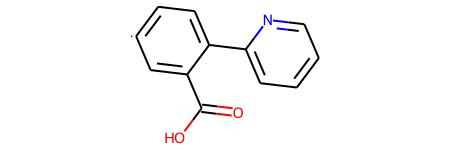

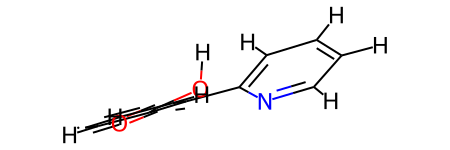

74.41557465861229


In [2]:
smi = "OC(=O)C1=C[C]=CC=C1C1=CC=CC=N1"
mol = Chem.MolFromSmiles(smi)
display(mol)

mol = etkdg(mol)[0]
display(mol)

starting_e = mmff.sp(mol)
print(starting_e)

# mol, final_e = mmff.opt(mol)
# display(mol)
# print(final_e)

In [3]:
from molclub.compute import gfnff

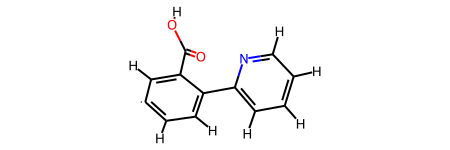

-3027.3535509030103


In [27]:
mol, energy = gfnff.opt(mol)
display(mol)
print(energy)

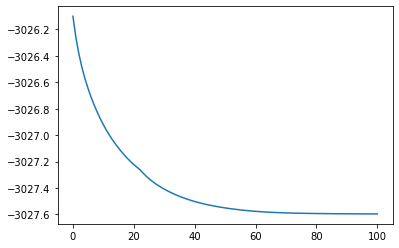

In [5]:
step, energies = gfnff.opt_traj(mol, max_iters=100)

plt.plot(step, energies)

In [1]:
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import rdForceFieldHelpers, rdMolAlign
from rdkit.Chem.Draw import IPythonConsole

from molclub import conf_gen, mmff

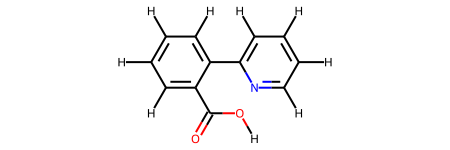

2

In [21]:
smi = "OC(=O)C1=CC=CC=C1C1=CC=CC=N1"
mol = Chem.MolFromSmiles(smi)
# mol = Chem.MolFromSmiles('CCOCC')
mol = Chem.AddHs(mol)
display(mol)

mols, energies = conf_gen.rdkit_conf_gen(mol)
len(mols)

In [12]:
mol = Chem.MolFromSmiles('CN1C(=O)C2=C(N(N=C2N3C1=NC4C3CCC4)CC5=CC=C(C=C5)C6=NC(=CC=C6)F)NC7=CC=CC=C7')
mols = conf_gen.etkdg(
    mol,
)
print(len(mols))

mols = conf_gen.prune(
    mols,
    None,
    1
)
print(len(mols))

200
2
